In [129]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt

In [141]:
def fitness(individual, items, capacity):
    total_value = 0
    total_weight = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            total_value += items[i][0]
            total_weight += items[i][1]
    if total_weight <= capacity:
        return total_value
    return 0

In [142]:
def random_population(population_size, individual_size):
    population = [np.random.choice([0, 1], size=(individual_size,)) for _ in range(population_size)]
        
    return population

In [143]:
def read_data(filename: str) -> np.array:
    f = open(filename, "r")
    first_line = f.readline().split()
    item_amount = int(first_line[0])
    bag_capacity = int(first_line[1])

    pop = np.zeros((item_amount, 2), dtype=int)
    for i in range(item_amount):
        pop[i] = f.readline().split()

    return pop, bag_capacity

In [144]:
def two_point_crossover(parent_one, parent_two):
    first_point = random.randint(0, len(parent_one) - 2)
    second_point = random.randint(first_point, len(parent_one) - 1)

    child_one = np.concatenate((parent_one[:first_point], parent_two[first_point:second_point], parent_one[second_point:]))
    child_two = np.concatenate((parent_two[:first_point], parent_one[first_point:second_point], parent_two[second_point:]))
    return child_one, child_two

In [145]:
def mutation_switch(population,individual_mutation_prob=0.2,value_mutation_prob=0.1):
    new_population = []

    for j in range(0,len(population)):
        individual = copy.deepcopy(population[j])
        if random.random() < individual_mutation_prob:
            for i in range(0,len(individual)):
                if random.random() < value_mutation_prob:
                    if individual[i] == 1:
                        individual[i] = 0
                    else:
                        individual[i] = 1
        new_population.append(individual)
    return new_population

In [146]:
def selection(population,fitness_value): 
    new_population = []
    
    for i in range(0,int(np.ceil(len(population)/2))):

        first_idx = random.randint(0, len(population) -1)
        second_idx = random.randint(0, len(population) -1)

        third_idx = random.randint(0, len(population) -1)
        fourth_idx = random.randint(0, len(population) -1)

        first_parent, second_parent = None, None

        if fitness_value[first_idx] > fitness_value[second_idx]:
            first_parent = population[first_idx]
        else:
            first_parent = population[second_idx]

        if fitness_value[third_idx] > fitness_value[fourth_idx]:
            second_parent = population[third_idx]
        else:
            second_parent = population[fourth_idx]

        new_population.append([first_parent, second_parent])
    return new_population 

In [147]:
def evolution(data_filename: str, population_size: int, max_generations: int):
    max_fitness = []
    items, bag_capacity = read_data(data_filename)
    population = random_population(population_size, len(items))
    
    for i in range(0,max_generations):
        fitness_value = [fitness(individual=individual, items=items, capacity=bag_capacity) for individual in population]
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value)
        children = np.array([[i for i in two_point_crossover(p[0], p[1])] for p in parents]).reshape(-1, len(items))
        mutated_children = mutation_switch(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = [fitness(individual=individual, items=items, capacity=bag_capacity) for individual in population]
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness, items, bag_capacity

best fitness:  295
best individual:  [0 1 1 1 0 0 0 1 1 1]


Text(0.5, 0, 'Generace')

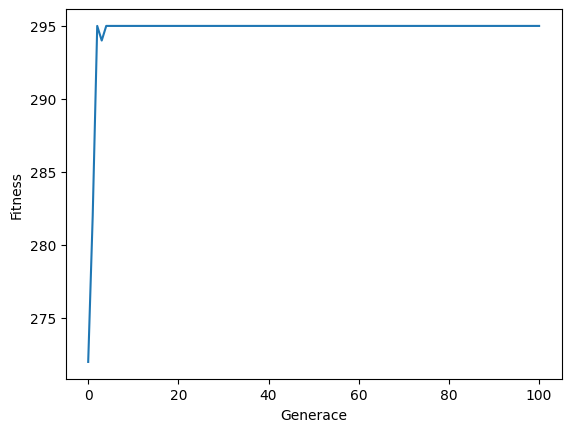

In [148]:
best, population, max_fitness, items, bag_capacity = evolution("data/debugging_data_10.txt" ,population_size=100, max_generations=100)

print('best fitness: ', fitness(best, items, bag_capacity))
print('best individual: ', best)

plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

best fitness:  1024
best individual:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1]


Text(0.5, 0, 'Generace')

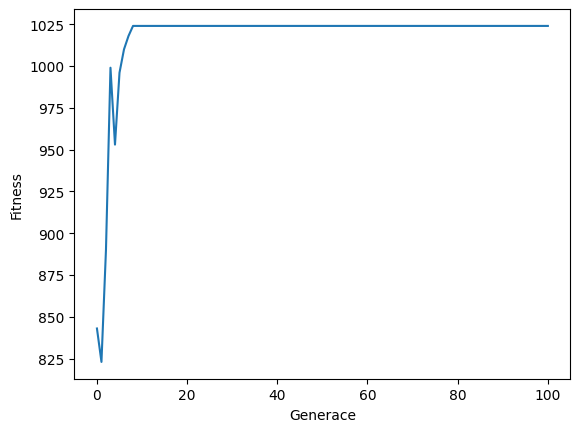

In [149]:
best, population, max_fitness, items, bag_capacity = evolution("data/debugging_data_20.txt" ,population_size=100, max_generations=100)

print('best fitness: ', fitness(best, items, bag_capacity))
print('best individual: ', best)

plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

best fitness:  10004
best individual:  [0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


Text(0.5, 0, 'Generace')

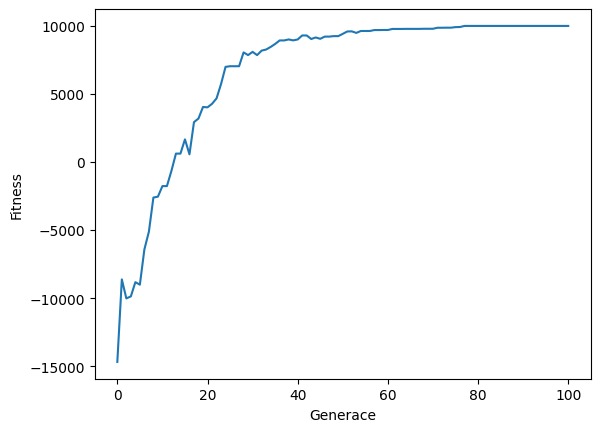

In [150]:
best, population, max_fitness, items, bag_capacity = evolution("data/input_data_100.txt" ,population_size=100, max_generations=100)

print('best fitness: ', fitness(best, items, bag_capacity))
print('best individual: ', best)

plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

best fitness:  -78411
best individual:  [1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0

Text(0.5, 0, 'Generace')

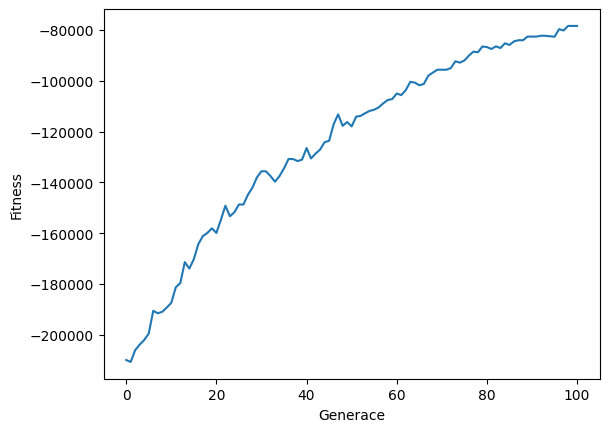

In [151]:
best, population, max_fitness, items, bag_capacity = evolution("data/input_data_1000.txt" ,population_size=100, max_generations=100)

print('best fitness: ', fitness(best, items, bag_capacity))
print('best individual: ', best)

plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')